# Early voting statistics in battleground states

In [1]:
import tabula 
import json
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
from pandas.io.json import json_normalize
import bs4 as BeautifulSoup
from altair_saver import save
from altair import datum
import altair as alt
import altair_latimes as lat
import re
import urllib
from bs4 import BeautifulSoup
alt.themes.register("latimes", lat.theme)
alt.themes.enable("latimes")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 34000
pd.set_option('display.max_colwidth', None)

### North Carolina

In [2]:
url = 'https://electproject.github.io/Early-Vote-2020G/NC.html'
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome('/Users/mhustiles/Desktop/chromedriver', options=options)
driver.get("https://electproject.github.io/Early-Vote-2020G/NC.html")
html_table = driver.page_source
soup = BeautifulSoup(html_table)
json_data = soup.find_all("script", type='application/json')[6].string

In [3]:
nc_counties = pd.DataFrame(json.loads(json_data)['x']['data']).transpose()

In [4]:
nc_counties = nc_counties.rename(columns={0:'county', 1:'mail_returned', 2:'mail_rejected', 3:'rejected_pct'}).fillna('0')

In [5]:
nc_counties['rejected_pct'] = nc_counties['rejected_pct']*100

In [6]:
nc_counties['state'] = 'North Carolina'
nc_counties['fips'] = '37'

In [7]:
nc_counties[['mail_returned', 'mail_rejected', 'rejected_pct']] = nc_counties[['mail_returned', 'mail_rejected', 'rejected_pct']].astype(float)

In [8]:
nc_counties.sort_values('rejected_pct', \
                        ascending=False).to_csv('output/rejected/nc_counties.csv', index=False)

In [9]:
df_nc = pd.read_html(url)

#### Summary tables for mail ballots, by race and party

In [10]:
nc_rejected_party = df_nc[11]
nc_rejected_party.rename(columns={ 'Party':'party','Rejected Ballots':'rejected','Freq. Distribution':'electorate_share','All Returned Ballots':'ballots', 'Rejection Rate':'reject_rate' })

,Gender,Returned Ballots,electorate_share,Requested Ballots,Return Rate
0,Female,515441,52.7,776253,66.4
1,Male,383866,39.3,560977,68.4
2,Unknown,77879,8.0,118784,65.6
3,TOTAL,977186,100.0,1456014,67.1


In [11]:
nc_rejected_race = df_nc[12]
nc_rejected_race.rename(columns={ 'Race/Ethnicity':'race/ethnicity','Rejected Ballots':'rejected','Freq. Distribution':'electorate_share','All Returned Ballots':'ballots', 'Rejection Rate':'reject_rate' })

,Party,rejected,electorate_share,ballots,reject_rate
0,Democrats,4125,51.9,442375,0.9
1,Republicans,1390,17.5,202559,0.7
2,Minor,40,0.5,5326,0.8
3,No Party Affiliation,2400,30.2,334881,0.7
4,TOTAL,7955,100.0,985141,0.8


---

## Pennsylvania

#### Read data

In [12]:
df_pa = pd.read_html('https://electproject.github.io/Early-Vote-2020G/PA.html')

#### Summary table for all mail ballots

In [13]:
df_pa[0]

,Party,Returned Ballots,Freq. Distribution,Requested Ballots,Return Rate
0,Democrats,1694719,64.8,1945499,87.1
1,Republicans,620282,23.7,787752,78.7
2,Minor,19873,0.8,25496,77.9
3,No Party Affiliation,280171,10.7,337321,83.1
4,TOTAL,2615045,100.0,3096068,84.5


#### Get detailed data for counties

In [14]:
url = 'https://electproject.github.io/Early-Vote-2020G/PA.html'
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome('/Users/mhustiles/Desktop/chromedriver', options=options)
driver.get("https://electproject.github.io/Early-Vote-2020G/PA.html")
html_table = driver.page_source
soup = BeautifulSoup(html_table)
json_data = soup.find_all("script", type='application/json')[3].string

In [15]:
pa_counties = pd.DataFrame(json.loads(json_data)['x']['data']).transpose()

In [16]:
pa_counties = pa_counties.rename(columns={0:'county', 1:'mail_returned', 2:'mail_rejected', 3:'rejected_pct'}).fillna('0')

In [17]:
pa_counties['rejected_pct'] = pa_counties['rejected_pct']*100

In [18]:
pa_counties['state'] = 'Pennsylvania'
pa_counties['fips'] = '42'

In [19]:
pa_counties[['mail_returned', 'mail_rejected', 'rejected_pct']] = pa_counties[['mail_returned', 'mail_rejected', 'rejected_pct']].astype(float)

In [20]:
pa_counties.sort_values('rejected_pct', ascending=False).to_csv('output/rejected/pa_counties.csv', index=False)

---

### Iowa

In [21]:
ia_url = 'https://electproject.github.io/Early-Vote-2020G/IA.html'
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome('/Users/mhustiles/Desktop/chromedriver', options=options)
driver.get(ia_url)
html_table = driver.page_source
soup = BeautifulSoup(html_table)
json_data = soup.find_all("script", type='application/json')[3].string

#### Summary table for all mail ballots

In [22]:
df_ia = pd.read_html(ia_url)

In [23]:
df_ia[0]

,Party,Returned Ballots,Freq. Distribution,Requested Ballots,Return Rate
0,Democrats,449290,45.1,462222,97.2
1,Republicans,331802,33.3,341866,97.1
2,Minor,4889,0.5,5186,94.3
3,No Party Affiliation,211000,21.2,221085,95.4
4,TOTAL,996981,100.0,1030359,96.8


#### Get counties

In [24]:
ia_counties = pd.DataFrame(json.loads(json_data)['x']['data']).transpose()

In [25]:
ia_counties = ia_counties.rename(columns={0:'county', 1:'mail_returned', 2:'mail_rejected', 3:'rejected_pct'}).fillna('0')

In [26]:
ia_counties['rejected_pct'] = ia_counties['rejected_pct']*100

In [27]:
ia_counties['state'] = 'Iowa'
ia_counties['fips'] = '19'

In [28]:
ia_counties[['mail_returned', 'mail_rejected', 'rejected_pct']] = ia_counties[['mail_returned', 'mail_rejected', 'rejected_pct']].astype(float)

In [29]:
ia_counties.sort_values('rejected_pct', ascending=False).to_csv('output/rejected/ia_counties.csv', index=False)

In [30]:
ia_counties.sort_values('rejected_pct', ascending=False).head()

,county,mail_returned,mail_rejected,rejected_pct,state,fips
37,Grundy County,3408.0,49.0,1.437793,Iowa,19
41,Hardin County,5019.0,65.0,1.295079,Iowa,19
89,Wapello County,8696.0,97.0,1.115455,Iowa,19
40,Hancock County,2979.0,29.0,0.973481,Iowa,19
9,Buchanan County,5700.0,48.0,0.842105,Iowa,19


---

### Michigan

In [31]:
url = 'https://electproject.github.io/Early-Vote-2020G/MI.html'
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome('/Users/mhustiles/Desktop/chromedriver', options=options)
driver.get("https://electproject.github.io/Early-Vote-2020G/MI.html")
html_table = driver.page_source
soup = BeautifulSoup(html_table)
json_data = soup.find_all("script", type='application/json')[3].string

In [32]:
mi_counties = pd.DataFrame(json.loads(json_data)['x']['data']).transpose()

In [33]:
mi_counties = mi_counties.rename(columns={0:'county', 1:'mail_rejected', 2:'mail_returned', 3:'rejected_pct'}).fillna('0')

In [34]:
mi_counties['rejected_pct'] = mi_counties['rejected_pct']*100

In [35]:
mi_counties['state'] = 'Michigan'
mi_counties['fips'] = '26'

In [36]:
mi_counties[['mail_returned', 'mail_rejected', 'rejected_pct']] = mi_counties[['mail_returned', 'mail_rejected', 'rejected_pct']].astype(float)

In [37]:
mi_counties.sort_values('rejected_pct', ascending=False).to_csv('output/rejected/mi_counties.csv', index=False)

In [38]:
mi_counties.sort_values('rejected_pct', ascending=False).head()

,county,mail_rejected,mail_returned,rejected_pct,state,fips
47,Luce,3.0,974.0,0.308008,Michigan,26
1,Alger,4.0,1938.0,0.206398,Michigan,26
34,Iosco,14.0,7086.0,0.197573,Michigan,26
59,Montmorency,4.0,2222.0,0.180018,Michigan,26
73,Sanilac,13.0,7505.0,0.173218,Michigan,26


#### Michigan manual

In [39]:
mi_manual = 1856

---

### Georgia

In [40]:
url = 'https://electproject.github.io/Early-Vote-2020G/GA.html'
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome('/Users/mhustiles/Desktop/chromedriver', options=options)
driver.get("https://electproject.github.io/Early-Vote-2020G/GA.html")
html_table = driver.page_source
soup = BeautifulSoup(html_table)
json_data = soup.find_all("script", type='application/json')[5].string

In [41]:
ga_tables = pd.read_html('https://electproject.github.io/Early-Vote-2020G/GA.html')

In [42]:
ga_rejection_race = ga_tables[10]

In [43]:
ga_rejection_race

,Race/Ethnicity,Rejected Ballots,Freq. Distribution,Returned Ballots (All),Rejection Rate
0,Non-Hispanic White,649,33.1,699219,0.1
1,Non-Hispanic Black,908,46.3,400572,0.2
2,Hispanic,71,3.6,34747,0.2
3,Non-Hispanic Asian American,90,4.6,49375,0.2
4,Non-Hispanic Native American,3,0.2,1940,0.2
5,Other/Multiple/Unknown,239,12.2,134499,0.2
6,TOTAL,1960,100.0,1320352,0.1


In [44]:
ga_rejection_race['clean_rate'] = (ga_rejection_race['Rejected Ballots'] / ga_rejection_race['Returned Ballots (All)'])*100

In [45]:
ga_counties = pd.DataFrame(json.loads(json_data)['x']['data']).transpose()

In [46]:
ga_counties = ga_counties.rename(columns={0:'county', 1:'mail_rejected', 2:'mail_returned', 3:'rejected_pct'}).fillna('0')

In [47]:
ga_counties['rejected_pct'] = ga_counties['rejected_pct']*100

In [48]:
ga_counties['state'] = 'Georgia'
ga_counties['fips'] = '13'

In [49]:
ga_counties[['mail_returned', 'mail_rejected', 'rejected_pct']] = ga_counties[['mail_returned', 'mail_rejected', 'rejected_pct']].astype(float)

In [50]:
ga_counties = ga_counties[[ 'county', 'mail_returned', 'mail_rejected', 'rejected_pct', 'state', 'fips']]

In [51]:
ga_counties.sort_values('rejected_pct', ascending=False).to_csv('output/rejected/ga_counties.csv', index=False)

In [52]:
ga_counties.sort_values('rejected_pct', ascending=False).head()

,county,mail_returned,mail_rejected,rejected_pct,state,fips
29,CLAY,414.0,9.0,2.173913,Georgia,13
132,TAYLOR,796.0,14.0,1.758794,Georgia,13
23,CHARLTON,703.0,8.0,1.137980,Georgia,13
127,STEWART,489.0,5.0,1.022495,Georgia,13
87,LEE,2518.0,25.0,0.992851,Georgia,13


---

### Nevada

In [53]:
### Download https://www.nvsos.gov/sos/home/showdocument?id=9060

In [54]:
# !curl -o nevada.pdf 'https://www.nvsos.gov/sos/home/showdocument?id=9060'

In [55]:
nv_need_cure = pd.read_csv('input/tabula-2020GeneralElectionSignatu.csv', header=None, names=[ 'county', 'mail_rejected', 'rejected_pct', 'dem', 'rep', 'other' ])

In [56]:
nv_need_cure['mail_rejected'] =  nv_need_cure['mail_rejected'].str.replace(' ,', '').str.replace(' ', '').replace('-', '0')
nv_need_cure['rejected_pct'] =  nv_need_cure['rejected_pct'].str.replace('%', '')

In [57]:
nv_need_cure[['dem', 'rep', 'other']] =  nv_need_cure[['dem', 'rep', 'other']].replace('-', '0')

In [58]:
nv_need_cure['state'] = 'Nevada'
nv_need_cure['fips'] = '32'

In [59]:
nv_mail_totals = pd.read_csv('input/tabula-2020GeneralElectionMailBal.csv', header=None)

In [60]:
nv_mail_totals = nv_mail_totals[[0,11]].rename(columns={0:'county', 11:'mail_returned'})

In [61]:
nv_mail_totals['mail_returned'] = nv_mail_totals['mail_returned'].str.replace(' ', '').str.replace('%', '').str.replace(',', '')
nv_mail_totals['county'] = nv_mail_totals['county'].str.replace('*', '', regex=None)

In [62]:
nv_counties_parties = pd.merge(nv_mail_totals, nv_need_cure, on='county')

In [63]:
nv_counties = nv_counties_parties.drop(['dem', 'rep', 'other'], axis=1)

In [64]:
nv_counties[['mail_returned', 'mail_rejected', 'rejected_pct']] = nv_counties[['mail_returned', 'mail_rejected', 'rejected_pct']].astype(float)

In [65]:
nv_counties.sort_values('rejected_pct', ascending=False).head()

,county,mail_returned,mail_rejected,rejected_pct,state,fips
7,Humboldt,1821.0,37.0,2.03,Nevada,32
1,Churchill,3606.0,68.0,1.89,Nevada,32
15,Washoe,102473.0,1137.0,1.11,Nevada,32
6,Eureka,291.0,3.0,1.03,Nevada,32
3,Douglas,16200.0,165.0,1.02,Nevada,32


---

## Florida

#### Broward County

In [66]:
url = 'https://www.browardsoe.org/'

In [67]:
# flraw = pd.read_html(url)

In [68]:
# fl_broward = pd.DataFrame(flraw[1]).drop([0, 5], axis=0)

In [69]:
# fl_broward = fl_broward.rename(columns={0:'cause', 1: 'count'})

In [70]:
# fl_broward['count'] = fl_broward['count'].astype(int)

#### How many rejected in Broward County? 

In [71]:
# fl_broward['count'].sum()

#### How many rejected in Miami-Dade? 

In [72]:
fl_miami = 2583

In [73]:
fl_tampa = 463

In [74]:
florida_sum = fl_miami + fl_tampa

#### How many total from our two counties in Florida? 

In [75]:
florida_sum

3046

In [76]:
fl_tables = pd.read_html('https://electproject.github.io/Early-Vote-2020G/FL.html')

In [77]:
fl_mail = fl_tables[2]

In [78]:
fl_mail_sum = fl_mail.iloc[4,1]

In [79]:
florida_state = pd.DataFrame(columns = ['state', 'mail_returned', 'mail_rejected', 'rejected_pct'])

In [80]:
florida_state = florida_state.append({'state' : 'Florida*', 'mail_rejected' : florida_sum, }, ignore_index = True).fillna('')

In [81]:
florida_state['mail_returned'] = fl_mail_sum

In [82]:
florida_state['rejected_pct'] = round((florida_state['mail_rejected'] / florida_state['mail_returned'] )*100, 2)

In [83]:
florida_state.head()

,state,mail_returned,mail_rejected,rejected_pct
0,Florida*,4737540,3046,0.06


---

## Aggregates

In [84]:
counties = pd.concat([ga_counties, mi_counties, ia_counties, pa_counties, nc_counties, nv_counties])

In [85]:
counties.sort_values('rejected_pct', ascending=False).to_csv('output/rejected/all_counties.csv', index=False)

#### Manual labor *sigh* needed for future join

In [86]:
counties['county'] = counties['county'].str.upper()

In [87]:
counties['county'] = counties['county'].str.replace(' COUNTY', '')

In [88]:
states = counties.groupby('state').agg({'mail_returned':'sum', 'mail_rejected': 'sum', }).reset_index()

In [89]:
states.loc[((states['state'] == 'Michigan') & (states['mail_rejected'] < mi_manual)), 'mail_rejected'] = mi_manual

In [90]:
states = states.append(florida_state, ignore_index=True)

In [91]:
states['rejected_pct'] = round((states['mail_rejected'] / states['mail_returned'] )*100, 2)

#### How many returned nationwide?

In [92]:
states.mail_rejected.sum()

22229.0

In [93]:
states.to_csv('output/states_mail_rejected.csv', index=False)

In [94]:
states.style.format({'mail_returned': "{:,.0f}", 'mail_rejected': "{:,.0f}", 'rejected_pct': '{:.2f}%'})

,state,mail_returned,mail_rejected,rejected_pct
0,Georgia,"1,322,843","2,689",0.20%
1,Iowa,"757,879","1,468",0.19%
2,Michigan,"2,569,678","1,856",0.07%
3,Nevada,"537,120","4,206",0.78%
4,North Carolina,"969,691","7,955",0.82%
5,Pennsylvania,"1,691,139","1,009",0.06%
6,Florida*,"4,737,540","3,046",0.06%


In [95]:
states.head(10)

,state,mail_returned,mail_rejected,rejected_pct
0,Georgia,1322843.0,2689.0,0.20
1,Iowa,757879.0,1468.0,0.19
2,Michigan,2569678.0,1856.0,0.07
3,Nevada,537120.0,4206.0,0.78
4,North Carolina,969691.0,7955.0,0.82
5,Pennsylvania,1691139.0,1009.0,0.06
6,Florida*,4737540.0,3046.0,0.06


#### Add FIPS codes

In [96]:
fips_counties = pd.read_csv('/Users/mhustiles/data/data/fips_counties.csv', dtype={'geoid':str}).drop(['Unnamed: 0'], axis=1)

In [97]:
fips_counties['county'] = fips_counties['county'].str.upper()

#### Merge after the manual labor under the hood

In [98]:
fips_merge = pd.merge(counties, fips_counties, left_on=['county','state'], right_on = ['county','state'])

In [99]:
fips_merge.head()

,county,mail_returned,mail_rejected,rejected_pct,state,fips,geoid,population,postal,state_ap
0,APPLING,1533.0,0.0,0.000000,Georgia,13,13001,18027,GA,Ga.
1,ATKINSON,297.0,0.0,0.000000,Georgia,13,13003,8294,GA,Ga.
2,BACON,693.0,2.0,0.288600,Georgia,13,13005,10439,GA,Ga.
3,BAKER,376.0,1.0,0.265957,Georgia,13,13007,4004,GA,Ga.
4,BALDWIN,4345.0,8.0,0.184120,Georgia,13,13009,47638,GA,Ga.


In [100]:
fips_merge.sort_values('rejected_pct', ascending=False).to_csv('output/rejected/fips_merge_all_counties.csv', index=False)

---

## Geography

In [101]:
our_fips = list(counties.fips.unique())

In [102]:
counties_geo = gpd.read_file('/Users/mhustiles/data/data/GIS/counties_lower48_small.json')

In [103]:
our_counties_geo = counties_geo[counties_geo['statefp'].isin(our_fips)]

In [104]:
fips_merge.dtypes

county            object
mail_returned    float64
mail_rejected    float64
rejected_pct     float64
state             object
fips              object
geoid             object
population         int64
postal            object
state_ap          object
dtype: object

#### Merge geo with out voting counties

In [105]:
lat_counties_geo = our_counties_geo.merge(fips_merge, on='geoid')

In [106]:
lat_counties_geo['above_2018_rate'] = lat_counties_geo['rejected_pct'] > 1.42

### Plot our counties

In [107]:
lat_counties_geo.to_file('output/gis/lat_counties_geo.geojson', driver='GeoJSON')

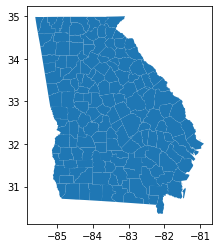

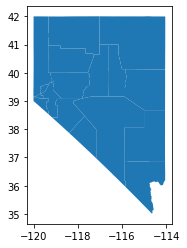

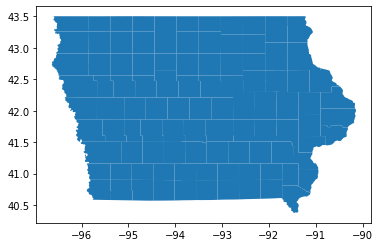

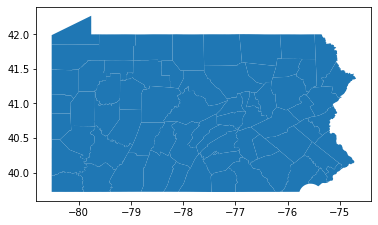

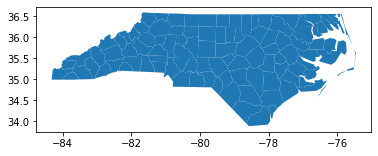

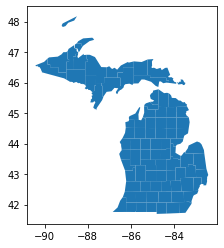

In [108]:
for f in lat_counties_geo.statefp.unique():
    lat_counties_geo[lat_counties_geo['statefp'] == f].plot()

In [109]:
for f in lat_counties_geo.statefp.unique():
    lat_counties_geo[lat_counties_geo['statefp'] == f].to_file('output/gis/' + f + '.geojson', driver='GeoJSON')

---

In [110]:
ga_statewide = pd.read_csv('/Users/mhustiles/Desktop/STATEWIDE.csv', low_memory=False, encoding='Latin-1')

In [111]:
ga_statewide.head()

,County,Voter Registration #,Last Name,First Name,Middle Name,Suffix,Street #,Street Name,Apt/Unit,City,State,Zip Code,Mailing Street #,Mailing Street Name,Mailing Apt/Unit,Mailing City,Mailing State,Mailing Zip Code,Application Status,Ballot Status,Status Reason,Application Date,Ballot Issued Date,Ballot Return Date,Ballot Style,Ballot Assisted,Challenged/Provisional,ID Required,Municipal Precinct,County Precinct,CNG,SEN,HOUSE,JUD,Combo #,Vote Center ID,Ballot ID,Post #,Party
0,APPLING,11467832,ABENDAN-DUBBERLY,JOSEFINA,CATHRYN,NaN,910,CLYDE MCCALL RD,NaN,BAXLEY,GA,31513,910,CLYDE MCCALL RD,NaN,BAXLEY,GA,31513-5741,A,A,NaN,10/14/2020,10/14/2020,10/14/2020,IN PERSON,NO,NO,NO,NaN,4B,12,19,178,BRUN,116,1021.0,972.0,3008.0,NaN
1,APPLING,6713908,ABRAMSON,ALFRED,FORBES,JR,285,CYPRESS DR,NaN,BAXLEY,GA,31513,285,CYPRESS DR,NaN,BAXLEY,GA,31513,A,A,NaN,04/06/2020,09/18/2020,09/25/2020,MAILED,NO,NO,NO,NaN,4D,12,19,178,BRUN,116,NaN,5.0,502.0,NaN
2,APPLING,6713917,ABRAMSON,ELEANOR,J,NaN,285,CYPRESS DR,NaN,BAXLEY,GA,31513-4491,285,CYPRESS DR,NaN,BAXLEY,GA,31513-4491,A,A,NaN,04/06/2020,09/18/2020,09/25/2020,MAILED,NO,NO,NO,NaN,4D,12,19,178,BRUN,116,NaN,4.0,499.0,NaN
3,APPLING,3540246,ACKER,STACY,LEIGH,NaN,3219,PINEY BLUFF RD,NaN,BAXLEY,GA,31513,3219,PINEY BLUFF RD,NaN,BAXLEY,GA,31513,A,A,NaN,10/27/2020,10/27/2020,10/27/2020,IN PERSON,NO,NO,NO,NaN,1B,12,19,156,BRUN,102,1021.0,3739.0,5918.0,NaN
4,APPLING,4506218,ADAIR,SHANNA,ELIZABETH,NaN,3861,KVILLE HWY,NaN,ODUM,GA,31555,3861,KVILLE HWY,NaN,ODUM,GA,31555,A,A,NaN,10/30/2020,10/30/2020,10/30/2020,IN PERSON,NO,NO,NO,NaN,4B,12,19,178,BRUN,116,1021.0,4606.0,6806.0,NaN


In [112]:
ga_status_c = ga_statewide[ga_statewide['Ballot Status'] == 'C']

In [113]:
rejected = ga_statewide[ga_statewide['Ballot Status'] == 'R']

In [114]:
len(rejected)

3168

In [115]:
rejected['Status Reason'].value_counts()

Ballot Received after Deadline    1761
Missing Signature                  947
Invalid Signature                  423
MIDR - ID not Provided              22
Ineligible Elector                  15
Name: Status Reason, dtype: int64

In [116]:
rejected.to_csv('output/ga_rejected.csv', index=False)